## Import relevant modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
sns.set()
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('Data_processed_mod.csv')

In [3]:
df.head()

,Price,Date,LONDON,Other Cities,Freehold,Leasehold,Unidentified,Detached,Flats/Maisonettes,Other,Semi-Detached,Terraced
0,73450,1995-10-09,0,1,1,0,0,1,0,0,0,0
1,59000,1995-03-31,0,1,1,0,0,1,0,0,0,0
2,31000,1995-12-04,0,1,1,0,0,1,0,0,0,0
3,95000,1995-09-22,0,1,1,0,0,1,0,0,0,0
4,45450,1995-02-28,0,1,1,0,0,0,0,0,1,0


## Scale the data

In [4]:
unscaled_inputs = df.copy()

In [5]:
unscaled_inputs.columns.values

array(['Price', 'Date', 'LONDON', 'Other Cities', 'Freehold', 'Leasehold',
       'Unidentified', 'Detached', 'Flats/Maisonettes', 'Other',
       'Semi-Detached', 'Terraced'], dtype=object)

In [6]:
#from sklearn.preprocessing import StandardScaler
#Higher_return_scaler = StandardScaler()

In [7]:
unscaled_inputs = unscaled_inputs.drop(['Date'],axis=1)
unscaled_inputs.head()

,Price,LONDON,Other Cities,Freehold,Leasehold,Unidentified,Detached,Flats/Maisonettes,Other,Semi-Detached,Terraced
0,73450,0,1,1,0,0,1,0,0,0,0
1,59000,0,1,1,0,0,1,0,0,0,0
2,31000,0,1,1,0,0,1,0,0,0,0
3,95000,0,1,1,0,0,1,0,0,0,0
4,45450,0,1,1,0,0,0,0,0,1,0


In [8]:
scaled_inputs = unscaled_inputs.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
scaled_inputs.head()

,Price,LONDON,Other Cities,Freehold,Leasehold,Unidentified,Detached,Flats/Maisonettes,Other,Semi-Detached,Terraced
0,0.000124,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000099,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.000052,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.000160,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000076,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
scaled_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25018010 entries, 0 to 25018009
Data columns (total 11 columns):
Price                float64
LONDON               float64
Other Cities         float64
Freehold             float64
Leasehold            float64
Unidentified         float64
Detached             float64
Flats/Maisonettes    float64
Other                float64
Semi-Detached        float64
Terraced             float64
dtypes: float64(11)
memory usage: 2.1 GB


**Check Point**

In [10]:
df2 = scaled_inputs.copy()
df2.tail()

,Price,LONDON,Other Cities,Freehold,Leasehold,Unidentified,Detached,Flats/Maisonettes,Other,Semi-Detached,Terraced
25018005,0.000691,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25018006,0.001026,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25018007,0.000072,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25018008,0.000595,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25018009,0.001994,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Take sample from the data for logistic regression

Due to the large volume of the data, we have to take a sample from the data to avoid the memory error and speed up the processing.

In [11]:
#Take 0.01% of the data
sample_lr = df2.sample(frac=0.0001)
sample_lr.head()

,Price,LONDON,Other Cities,Freehold,Leasehold,Unidentified,Detached,Flats/Maisonettes,Other,Semi-Detached,Terraced
11343426,0.000130,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5723796,0.000119,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
20919204,0.000412,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11782870,0.000328,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22544826,0.000284,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
sample_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2502 entries, 11343426 to 12442597
Data columns (total 11 columns):
Price                2502 non-null float64
LONDON               2502 non-null float64
Other Cities         2502 non-null float64
Freehold             2502 non-null float64
Leasehold            2502 non-null float64
Unidentified         2502 non-null float64
Detached             2502 non-null float64
Flats/Maisonettes    2502 non-null float64
Other                2502 non-null float64
Semi-Detached        2502 non-null float64
Terraced             2502 non-null float64
dtypes: float64(11)
memory usage: 234.6 KB


## Plot the sample data

C:\Users\ding_\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\ding_\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\ding_\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\ding_\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\ding_\Anaconda3\lib\sit

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CFC5BC56D8>,
      dtype=object)

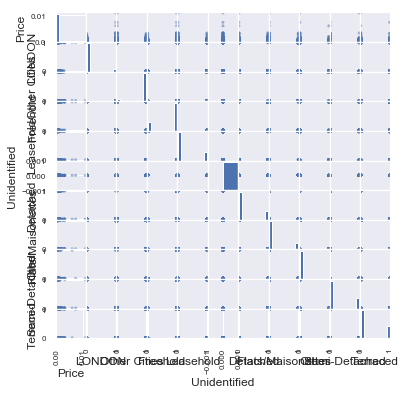

In [13]:
scatter_matrix(sample_lr,alpha=0.5,figsize=(6,6),ax=None,diagonal='hist',marker='.',density_kwds=None,hist_kwds=None,range_padding=0.05)

## Check the target

In [14]:
#find the median of "Price"
targets = np.where(sample_lr['Price']>
                   sample_lr['Price'].median(),1,0)

In [15]:
targets

array([0, 0, 1, ..., 0, 1, 0])

In [16]:
sample_lr['Higher Pricing']=targets
sample_lr.head()

,Price,LONDON,Other Cities,Freehold,Leasehold,Unidentified,Detached,Flats/Maisonettes,Other,Semi-Detached,Terraced,Higher Pricing
11343426,0.000130,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
5723796,0.000119,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
20919204,0.000412,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
11782870,0.000328,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
22544826,0.000284,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [17]:
targets.sum()/targets.shape[0]

0.5

In [18]:
sample_1r_mod = sample_lr.drop(['Higher Pricing','Price'],axis=1)
sample_1r_mod.head()

,LONDON,Other Cities,Freehold,Leasehold,Unidentified,Detached,Flats/Maisonettes,Other,Semi-Detached,Terraced
11343426,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5723796,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
20919204,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11782870,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22544826,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Train and split

In [19]:
#Split
train_test_split(sample_1r_mod,targets)

[          LONDON  Other Cities  Freehold  Leasehold  Unidentified  Detached  \
 9332736      0.0           1.0       1.0        0.0           0.0       0.0   
 8958192      0.0           1.0       1.0        0.0           0.0       0.0   
 21708154     0.0           1.0       1.0        0.0           0.0       0.0   
 16073342     0.0           1.0       1.0        0.0           0.0       0.0   
 3720500      0.0           1.0       1.0        0.0           0.0       0.0   
 24044802     0.0           1.0       1.0        0.0           0.0       0.0   
 12386865     0.0           1.0       1.0        0.0           0.0       0.0   
 20349844     0.0           1.0       1.0        0.0           0.0       1.0   
 24807012     0.0           1.0       1.0        0.0           0.0       0.0   
 13416055     0.0           1.0       1.0        0.0           0.0       0.0   
 19356404     0.0           1.0       1.0        0.0           0.0       0.0   
 19937402     1.0           0.0       1.

In [20]:
x_train,x_test,y_train,y_test = train_test_split(sample_1r_mod,targets,train_size = 0.7,test_size = 0.3,random_state=20)

In [21]:
print(x_train.shape,y_train.shape)

(1751, 10) (1751,)


In [22]:
print(x_test.shape,y_test.shape)

(751, 10) (751,)


## Logistic regression with sklearn

In [23]:
# import the LogReg model from sklearn
from sklearn.linear_model import LogisticRegression

# import the 'metrics' module, which includes important metrics we may want to use
from sklearn import metrics

**Training the model**

In [24]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

C:\Users\ding_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
reg.score(x_train,y_train)

0.644774414620217

**Finding the intercept and coefficients**

In [26]:
reg.intercept_

array([0.26971907])

In [27]:
reg.coef_

array([[ 0.99413469, -0.72441563,  0.62661796, -0.35689889,  0.        ,
         0.72993169,  0.28179361,  0.30131086, -0.41116956, -0.63214753]])

In [28]:
scaled_inputs.columns.values

array(['Price', 'LONDON', 'Other Cities', 'Freehold', 'Leasehold',
       'Unidentified', 'Detached', 'Flats/Maisonettes', 'Other',
       'Semi-Detached', 'Terraced'], dtype=object)

In [29]:
feature_name = sample_1r_mod.columns.values

In [30]:
summary_table = pd.DataFrame(columns = ['Feature name'],data = feature_name )

summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table

,Feature name,Coefficient
0,LONDON,0.994135
1,Other Cities,-0.724416
2,Freehold,0.626618
3,Leasehold,-0.356899
4,Unidentified,0.000000
5,Detached,0.729932
6,Flats/Maisonettes,0.281794
7,Other,0.301311
8,Semi-Detached,-0.411170
9,Terraced,-0.632148


In [31]:
summary_table.index = summary_table.index+1

summary_table.loc[0] = ['Intercept',reg.intercept_[0]]

suammary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
1,LONDON,0.994135
2,Other Cities,-0.724416
3,Freehold,0.626618
4,Leasehold,-0.356899
5,Unidentified,0.000000
6,Detached,0.729932
7,Flats/Maisonettes,0.281794
8,Other,0.301311
9,Semi-Detached,-0.411170
10,Terraced,-0.632148


**Interpreting the coefficients**

In [32]:
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds_ratio',ascending=False)

,Feature name,Coefficient,Odds_ratio
1,LONDON,0.994135,2.702385
6,Detached,0.729932,2.074939
3,Freehold,0.626618,1.871271
8,Other,0.301311,1.351629
7,Flats/Maisonettes,0.281794,1.325505
0,Intercept,0.269719,1.309596
5,Unidentified,0.000000,1.000000
4,Leasehold,-0.356899,0.699843
9,Semi-Detached,-0.411170,0.662875
10,Terraced,-0.632148,0.531449


**Test the model**

In [33]:
reg.score(x_test,y_test)

0.6231691078561917

In [34]:
predicted_proba = reg.predict_proba(x_test)

predicted_proba

array([[0.28866984, 0.71133016],
       [0.55952836, 0.44047164],
       [0.28866984, 0.71133016],
       ...,
       [0.55952836, 0.44047164],
       [0.55952836, 0.44047164],
       [0.55952836, 0.44047164]])

In [35]:
predicted_proba.shape

(751, 2)

In [36]:
predicted_proba[:,1]

array([0.71133016, 0.44047164, 0.71133016, 0.44047164, 0.44047164,
       0.19096639, 0.38693218, 0.6161485 , 0.44047164, 0.38693218,
       0.71133016, 0.38693218, 0.38693218, 0.22745023, 0.38693218,
       0.71133016, 0.71133016, 0.3705631 , 0.71133016, 0.44047164,
       0.3705631 , 0.77873749, 0.71133016, 0.44047164, 0.71133016,
       0.71133016, 0.38693218, 0.44047164, 0.38693218, 0.3705631 ,
       0.3705631 , 0.44047164, 0.76651716, 0.44047164, 0.38693218,
       0.44047164, 0.71133016, 0.76651716, 0.71133016, 0.44047164,
       0.44047164, 0.38693218, 0.71133016, 0.22745023, 0.77873749,
       0.3705631 , 0.3705631 , 0.22745023, 0.44047164, 0.3705631 ,
       0.44047164, 0.76651716, 0.3705631 , 0.3705631 , 0.37512681,
       0.44047164, 0.38693218, 0.44047164, 0.71133016, 0.37512681,
       0.38693218, 0.44047164, 0.71133016, 0.38693218, 0.38693218,
       0.3705631 , 0.71133016, 0.71133016, 0.38693218, 0.44047164,
       0.44047164, 0.71133016, 0.71133016, 0.71133016, 0.38693

**Calculate the accuracy for the Logistic model**

In [124]:
from sklearn.metrics import accuracy_score
predictions = reg.predict(x_test)
print("Logistic Regression Model Accuracy: %.5f" % accuracy_score(y_test, predictions))

Logistic Regression Model Accuracy: 0.62317


## Decision Tree model

**Take another sample from the dataset**

In [61]:
sample_dt = df2.sample(frac=0.0002)
sample_dt.head()

,Price,LONDON,Other Cities,Freehold,Leasehold,Unidentified,Detached,Flats/Maisonettes,Other,Semi-Detached,Terraced
15473814,0.000782,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
12458170,0.000239,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1505064,0.000093,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19522043,0.000311,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5424330,0.000301,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [62]:
sample_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5004 entries, 15473814 to 6461343
Data columns (total 11 columns):
Price                5004 non-null float64
LONDON               5004 non-null float64
Other Cities         5004 non-null float64
Freehold             5004 non-null float64
Leasehold            5004 non-null float64
Unidentified         5004 non-null float64
Detached             5004 non-null float64
Flats/Maisonettes    5004 non-null float64
Other                5004 non-null float64
Semi-Detached        5004 non-null float64
Terraced             5004 non-null float64
dtypes: float64(11)
memory usage: 469.1 KB


**Create a target for DecisionTree**

In [63]:
#find the median of "Price"
targets_dt = np.where(sample_dt['Price']>
                   sample_dt['Price'].median(),1,0)

In [64]:
targets_dt

array([1, 1, 0, ..., 1, 0, 0])

In [65]:
sample_dt['Higher Pricing']=targets_dt
sample_dt.head()

,Price,LONDON,Other Cities,Freehold,Leasehold,Unidentified,Detached,Flats/Maisonettes,Other,Semi-Detached,Terraced,Higher Pricing
15473814,0.000782,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
12458170,0.000239,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1505064,0.000093,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
19522043,0.000311,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5424330,0.000301,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [66]:
targets_dt.sum()/targets_dt.shape[0]

0.49940047961630696

In [67]:
sample_dt_mod = sample_dt.drop(['Higher Pricing','Price'],axis=1)
sample_dt_mod.head()

,LONDON,Other Cities,Freehold,Leasehold,Unidentified,Detached,Flats/Maisonettes,Other,Semi-Detached,Terraced
15473814,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
12458170,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1505064,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19522043,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5424330,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Split the data to train & Test**

In [68]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import tree

train_test_split(sample_dt,targets_dt)

[             Price  LONDON  Other Cities  Freehold  Leasehold  Unidentified  \
 3320705   0.000303     0.0           1.0       0.0        1.0           0.0   
 17910887  0.000766     0.0           1.0       1.0        0.0           0.0   
 17329848  0.000298     0.0           1.0       1.0        0.0           0.0   
 4129585   0.000257     1.0           0.0       1.0        0.0           0.0   
 2826162   0.000116     0.0           1.0       1.0        0.0           0.0   
 2796934   0.000049     0.0           1.0       0.0        1.0           0.0   
 12346644  0.000415     0.0           1.0       1.0        0.0           0.0   
 20992538  0.000181     0.0           1.0       0.0        1.0           0.0   
 8712141   0.000125     0.0           1.0       1.0        0.0           0.0   
 4903191   0.000015     0.0           1.0       1.0        0.0           0.0   
 19660897  0.000274     0.0           1.0       1.0        0.0           0.0   
 9678401   0.000488     1.0           0.

In [69]:
sample_dt_mod.columns.values

array(['LONDON', 'Other Cities', 'Freehold', 'Leasehold', 'Unidentified',
       'Detached', 'Flats/Maisonettes', 'Other', 'Semi-Detached',
       'Terraced'], dtype=object)

In [70]:
vec = DictVectorizer(sparse=False)
feature = sample_dt_mod[['LONDON', 'Other Cities', 'Freehold', 'Leasehold', 'Unidentified',
       'Detached', 'Flats/Maisonettes', 'Other', 'Semi-Detached',
       'Terraced']]
x_train_2 = vec.fit_transform(feature.to_dict(orient='record'))

In [71]:
print('show features',feature)
print('show vectors',x_train_2)
print('show vector names',vec.get_feature_names())

show features           LONDON  Other Cities  Freehold  Leasehold  Unidentified  Detached  \
15473814     0.0           1.0       0.0        1.0           0.0       1.0   
12458170     0.0           1.0       0.0        1.0           0.0       0.0   
1505064      0.0           1.0       1.0        0.0           0.0       1.0   
19522043     0.0           1.0       1.0        0.0           0.0       0.0   
5424330      0.0           1.0       1.0        0.0           0.0       1.0   
21729108     0.0           1.0       0.0        1.0           0.0       0.0   
7210884      0.0           1.0       1.0        0.0           0.0       0.0   
13223649     1.0           0.0       1.0        0.0           0.0       0.0   
7629809      0.0           1.0       1.0        0.0           0.0       0.0   
11923683     0.0           1.0       0.0        1.0           0.0       1.0   
3557959      0.0           1.0       1.0        0.0           0.0       0.0   
23513552     0.0           1.0       1

In [72]:
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(sample_dt_mod,targets_dt,train_size = 0.75,test_size = 0.25,random_state=20)

**Train the decision tree**

In [73]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(x_train_2,y_train_2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Evaluate the model performance**

In [123]:
y_pred = clf.predict(x_test_2)

#We will use AUC (Area Under Curve) as the evaluation metric. Our target value is binary so it’s a binary classification problem. AUC is a good way for evaluation for this type of problems.


from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_2, y_pred)
print("Decision Tree Model Accuracy: %.5f" % auc(false_positive_rate, true_positive_rate))

Decision Tree Model Accuracy: 0.61904


**Save as file dot**

In [74]:
with open("out.dot", 'w') as f :
    f = tree.export_graphviz(clf, out_file = f,
            feature_names = vec.get_feature_names())

**Visualisation**

In [75]:
with open("out.dot", 'w') as f:
    f = tree.export_graphviz(clf, feature_names = vec.get_feature_names(), out_file = f) 

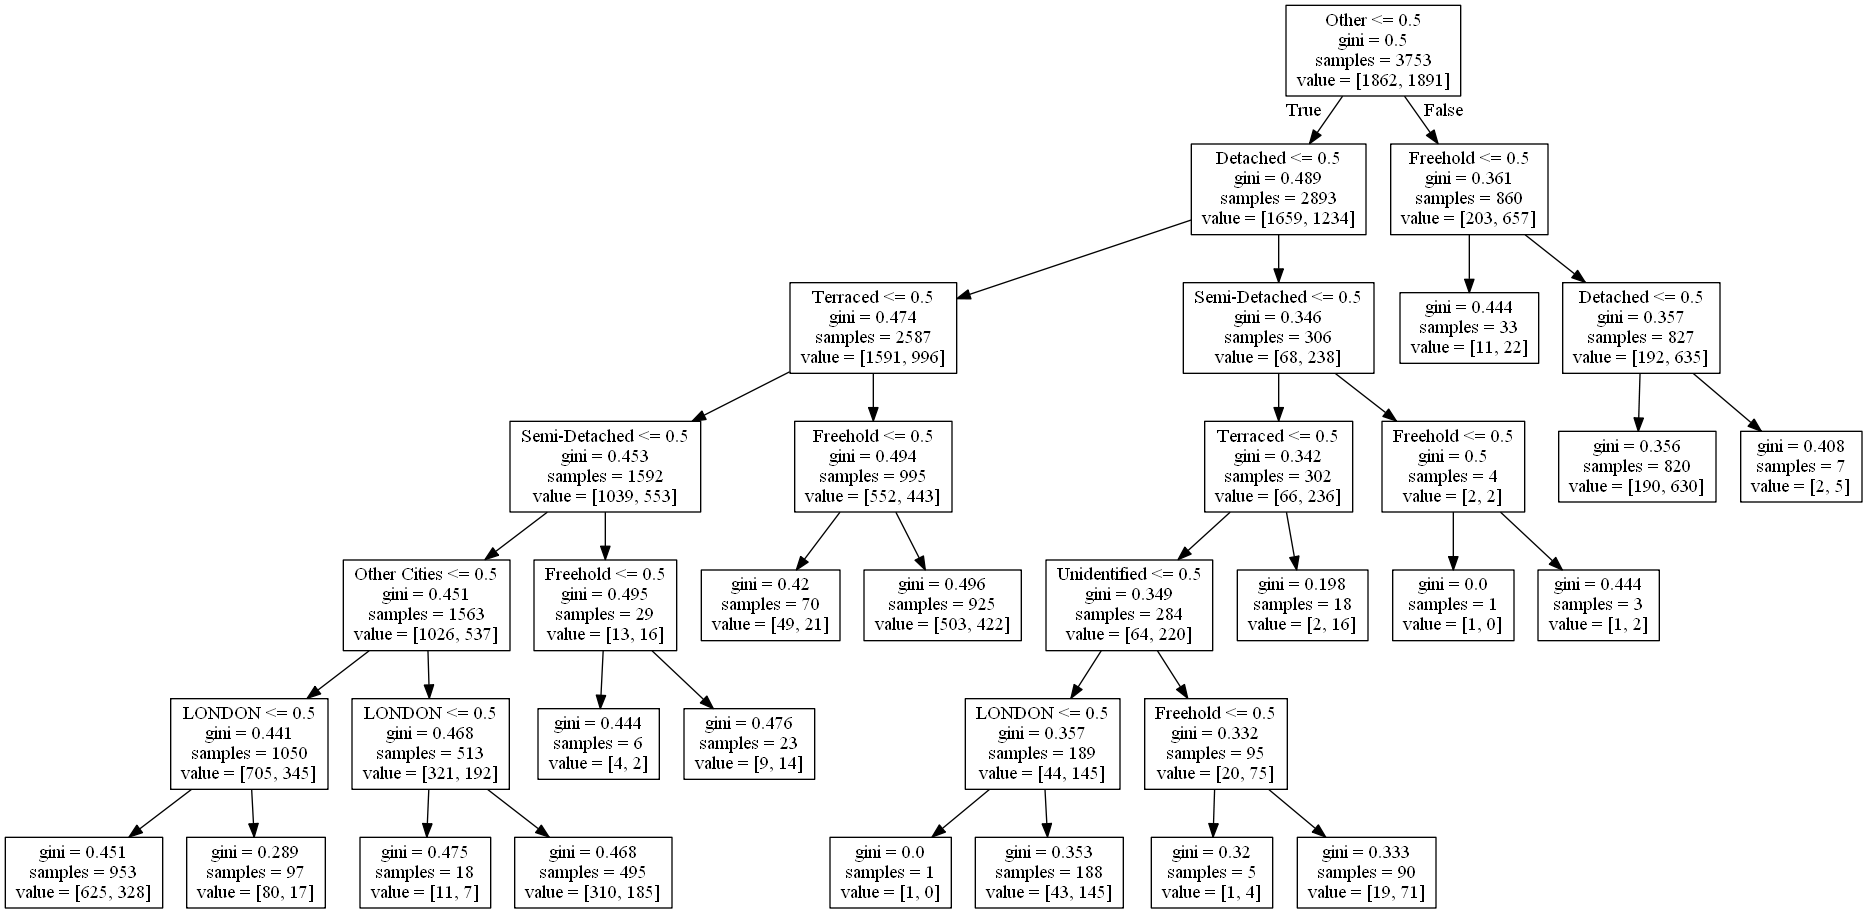

In [76]:
import pydotplus
from IPython.display import Image  
graph = pydotplus.graph_from_dot_file('out.dot')
Image(graph.create_png())

## Random Forest model

**Import the relevant modules**

In [110]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

**Split the data**

In [99]:
#Take another sample of the data
#Take 0.01% of the data
sample_rf = df2.sample(frac=0.0003)
sample_rf.head()

,Price,LONDON,Other Cities,Freehold,Leasehold,Unidentified,Detached,Flats/Maisonettes,Other,Semi-Detached,Terraced
23004999,0.000252,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12244522,0.000178,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1771411,0.000185,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7079484,0.000333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3512329,0.000130,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [100]:
sample_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7505 entries, 23004999 to 19992352
Data columns (total 11 columns):
Price                7505 non-null float64
LONDON               7505 non-null float64
Other Cities         7505 non-null float64
Freehold             7505 non-null float64
Leasehold            7505 non-null float64
Unidentified         7505 non-null float64
Detached             7505 non-null float64
Flats/Maisonettes    7505 non-null float64
Other                7505 non-null float64
Semi-Detached        7505 non-null float64
Terraced             7505 non-null float64
dtypes: float64(11)
memory usage: 703.6 KB


**Create the targets for Random forest model**

In [101]:
#find the median of "Price"
targets_rf = np.where(sample_rf['Price']>
                   sample_rf['Price'].median(),1,0)

In [102]:
targets_rf

array([1, 0, 0, ..., 0, 0, 1])

In [103]:
targets_rf.shape[0]

7505

In [104]:
targets_rf.sum()/targets_rf.shape[0]

0.4995336442371752

In [105]:
sample_rf_mod = sample_rf.drop(['Price'],axis=1)
sample_rf_mod.head()

,LONDON,Other Cities,Freehold,Leasehold,Unidentified,Detached,Flats/Maisonettes,Other,Semi-Detached,Terraced
23004999,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12244522,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1771411,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7079484,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3512329,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [106]:
sample_rf_mod.shape[0]

7505

**Split the train & Test data for Random forest model**

In [107]:
x_train_3,x_test_3,y_train_3,y_test_3 = train_test_split(sample_rf_mod,targets_rf,train_size = 0.75,test_size = 0.25,random_state=20)

**Train the Random forest model**

In [108]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train_3,y_train_3)
# predictions
rfc_predict = rfc.predict(x_test_3)

C:\Users\ding_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [111]:
rfc_cv_score = cross_val_score(rfc, sample_rf_mod, targets_rf, cv=10, scoring='roc_auc')

**Print the results**

In [114]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_3, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test_3, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[806 146]
 [502 423]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.62      0.85      0.71       952
           1       0.74      0.46      0.57       925

   micro avg       0.65      0.65      0.65      1877
   macro avg       0.68      0.65      0.64      1877
weighted avg       0.68      0.65      0.64      1877



=== All AUC Scores ===
[0.69507092 0.67372695 0.6977695  0.7025     0.70918085 0.68355319
 0.66834844 0.70484978 0.70724622 0.66937968]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6911625542028546


**Optimizing the model**

In [115]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto','sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth' : max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(x_train_3, y_train_3)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.9min finished


{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 140}


**Print the improved results**

In [117]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=140, max_features='sqrt')
rfc.fit(x_train_3,y_train_3)
# predictions
rfc_predict = rfc.predict(x_test_3)
rfc_cv_score = cross_val_score(rfc, sample_rf_mod, targets_rf, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_3, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test_3, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[806 146]
 [502 423]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.62      0.85      0.71       952
           1       0.74      0.46      0.57       925

   micro avg       0.65      0.65      0.65      1877
   macro avg       0.68      0.65      0.64      1877
weighted avg       0.68      0.65      0.64      1877



=== All AUC Scores ===
[0.6873617  0.67172695 0.69806028 0.7025     0.70918085 0.68456028
 0.66879644 0.70512711 0.70724622 0.6694082 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6903968048343258


**Compare the accuracy of three models**

In [126]:
print("Logistic Regression Model Accuracy: %.5f" % accuracy_score(y_test, predictions))
print("Decision Tree Model Accuracy: %.5f" % auc(false_positive_rate, true_positive_rate))
print("Mean AUC Score - Random Forest:%.5f"% rfc_cv_score.mean())

Logistic Regression Model Accuracy: 0.62317
Decision Tree Model Accuracy: 0.61904
Mean AUC Score - Random Forest:0.69040
